# On Airbnb listings - Seattle and Boston

We are going to be using the Airbnb data available in Kaggle for Seattle a Boston listings (https://www.kaggle.com/airbnb/seattle, https://www.kaggle.com/airbnb/boston ) for analysis, as seen on the source we have available three datasets for each city, so we are going to begin with exploring each source for Seattle and indentify the necesary transformations to work with them.

Datasets available:

1. calendar - including listing id and the price and availability for that day.
2. listings - including full descriptions and average review score.
3. reviews - including unique id for each reviewer and detailed comments.

## Questions of interest

1. When are the busiest times of each city? 
2. Which listing characteristics affect prices the most?
3. What are the most negative comments about?

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

In [2]:
cal_seattle = pd.read_csv('Seattle/calendar.csv')
cal_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Seems pretty straight forward info.

In [3]:
cal_seattle.shape

(1393570, 4)

In [4]:
cal_seattle.date = pd.to_datetime(cal_seattle.date)

In [5]:
print("Number of unique days in the calendar dataset: {}".format(len(cal_seattle.date.unique())))
print("Start date of the calendar: {}".format(min(cal_seattle.date.dt.strftime('%Y-%m-%d'))))
print("End date of the calendar: {}".format(max(cal_seattle.date.dt.strftime('%Y-%m-%d'))))
print("Range of the dates: {}".format(max(cal_seattle.date)-min(cal_seattle.date)))
print("Number of unique listing ids: {}".format(len(cal_seattle.listing_id.unique())))


Number of unique days in the calendar dataset: 365
Start date of the calendar: 2016-01-04
End date of the calendar: 2017-01-02
Range of the dates: 364 days 00:00:00
Number of unique listing ids: 3818


In [6]:
365*3818

1393570

Seems there is almost full 2016s info about availability and prices.

In [7]:
list_seattle = pd.read_csv('Seattle/listings.csv')
pd.set_option('display.max_columns', 92)
list_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [8]:
list_seattle.shape

(3818, 92)

In [9]:
pd.set_option('display.max_rows', 92)
list_seattle.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

We are going to begin by eliminating urls and ids not relevant for the analysis.

In [10]:
drop_cols =['listing_url',
            'scrape_id',
            'last_scraped',
            'name',
            'thumbnail_url',
            'medium_url',
            'picture_url',
            'xl_picture_url',
            'host_id',
            'host_url',
            'host_picture_url']
list_seattle.drop(labels = drop_cols, axis = 1, inplace = True)
list_seattle.shape

(3818, 81)

Now lets procede to drop the columns that only contain one value because we get no information from those, We have to be mindful when working with both Seattle and Boston datasets the single value city or one equivalent should be kept to diferentiate the origin of the data if the dataframes are merged.

In [11]:
for col in list(list_seattle.columns):
    if len(list_seattle[col].unique())== 1:
        print("{} -  {}".format(col, list(list_seattle[col].unique())[0]))

experiences_offered -  none
market -  Seattle
country_code -  US
country -  United States
has_availability -  t
calendar_last_scraped -  2016-01-04
requires_license -  f
license -  nan
jurisdiction_names -  WASHINGTON


We are keeping the column `market` to identify the origin when We merge data from both Seattle and Boston.

In [12]:
sgl_vl_cols = ['experiences_offered',
               'country_code',
               'country',
               'has_availability',
               'calendar_last_scraped',
               'requires_license',
               'license',
               'jurisdiction_names']
list_seattle.drop(labels = sgl_vl_cols, axis = 1, inplace = True)
list_seattle.shape

(3818, 73)

## When are the busiest times of each city? Do they match?

Lets see how are we able to identify when a listing is taken.

In [13]:
cal_seattle = pd.read_csv('Seattle/calendar.csv')
cal_seattle.date = pd.to_datetime(cal_seattle.date)

In [14]:
cal_seattle.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [15]:
cal_seattle.price = cal_seattle.price.str.replace('$','')
cal_seattle.price = cal_seattle.price.str.replace(',','').astype(float)

C:\Users\lccrurod\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [16]:
cal_seattle['year'] = cal_seattle['date'].dt.year
cal_seattle['month'] = cal_seattle['date'].dt.month

In [17]:
cal_seattle['is_available'] = np.where(cal_seattle.available =='f', 1,0)

In [18]:
cal_seattle.head()

,listing_id,date,available,price,year,month,is_available
0,241032,2016-01-04,t,85.0,2016,1,0
1,241032,2016-01-05,t,85.0,2016,1,0
2,241032,2016-01-06,f,NaN,2016,1,1
3,241032,2016-01-07,f,NaN,2016,1,1
4,241032,2016-01-08,f,NaN,2016,1,1


In [19]:
avail_seattle = cal_seattle[['is_available','listing_id','month']].groupby(['listing_id','month']).sum().reset_index()
avail_seattle.head()

,listing_id,month,is_available
0,3335,1,28
1,3335,2,28
2,3335,3,0
3,3335,4,0
4,3335,5,0


In [20]:
avail_seattle = pd.pivot_table(cal_seattle, values = 'is_available', index = 'listing_id', columns = 'month', aggfunc=np.sum).reset_index()
avail_seattle.head()

month,listing_id,1,2,3,4,5,6,7,8,9,10,11,12
0,3335,28,28,0,0,0,0,0,0,0,0,0,0
1,4291,0,0,0,0,0,0,0,0,0,0,0,0
2,5682,19,6,20,5,6,0,0,0,0,0,0,0
3,6606,0,0,0,0,0,0,0,0,0,0,0,0
4,7369,27,11,0,29,31,30,31,31,30,31,30,31


Lets repeat this process for Boston data.

In [21]:
cal_boston = pd.read_csv('Boston/calendar.csv')
cal_boston.date = pd.to_datetime(cal_boston.date)

cal_boston['year'] = cal_boston['date'].dt.year
cal_boston['month'] = cal_boston['date'].dt.month

cal_boston.price = cal_boston.price.str.replace('$','')
cal_boston.price = cal_boston.price.str.replace(',','').astype(float)

cal_boston['is_available'] = np.where(cal_boston.available =='f', 1,0)

avail_boston = cal_boston[['is_available','listing_id','month']].groupby(['listing_id','month']).sum().reset_index()
avail_boston = pd.pivot_table(cal_boston, values = 'is_available', index = 'listing_id', columns = 'month', aggfunc=np.sum).reset_index()


C:\Users\lccrurod\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  import sys


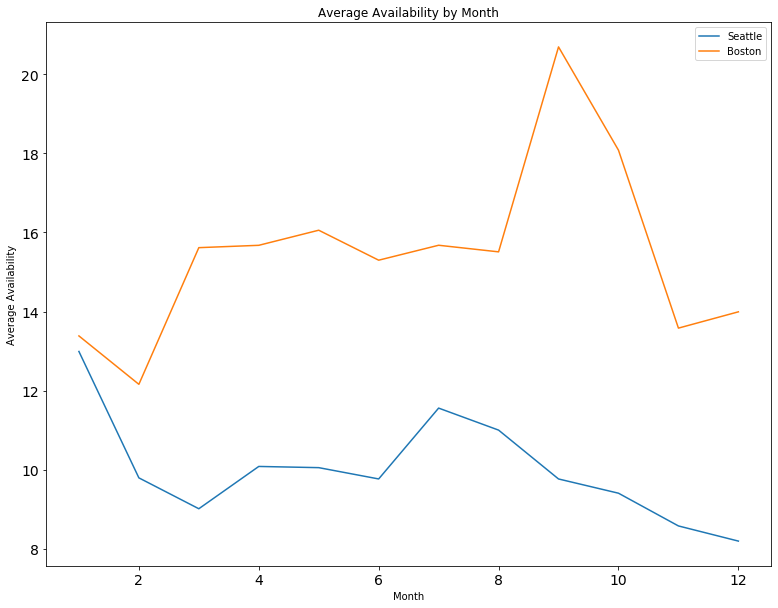

In [22]:
avail_df = pd.concat([avail_seattle.mean()[[x for x in range(1,13)]],
                      avail_boston.mean()[[x for x in range(1,13)]]],
                      axis = 1).rename(columns = {0:'Seattle', 1:'Boston'})

avail_df.plot(kind = 'line',
              xlabel = 'Month',
              ylabel = 'Average Availability',
              title = 'Average Availability by Month',
              figsize = (12,7),
              fontsize = 11);

We can identify the months of lowest availability by city, for **Seattle** we see a clear decay in availability in the last semester of the year, reaching it's lowest by **December**, Whereas for **Boston**, which has an overall higher availability than Seattle, reaches it's lowest average availability by **February**. 

## Which listing characteristics affect prices the most?

Let's start by defining which price are We going to attempt to predict, We could try predict maybe price for month or daily based on listing features and zone availability, for this analysis We are going to stick to predicting the hard price included in the listing data.

Now recaping the info on the listing data We have.

In [48]:
pd.options.display.max_rows = 999
list_seattle.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [49]:
max_len = lambda col: col.str.len().max()
unique_vals = lambda col: len(col.unique())
a = list_seattle[list_seattle.columns[list_seattle.dtypes == 'object']].apply(max_len, axis = 0)
b = list_seattle[list_seattle.columns[list_seattle.dtypes == 'object']].apply(unique_vals, axis = 0)
c = list_seattle[list_seattle.columns[list_seattle.dtypes == 'object']].isnull().mean()
pd.concat([a,b,c], axis = 1).rename(columns = {0:'Max length', 1:'Different values', 2:'Null pct'})

,Max length,Different values,Null pct
listing_url,37.0,3818,0.000000
last_scraped,10.0,1,0.000000
name,36.0,3792,0.000000
summary,1000.0,3479,0.046359
space,1000.0,3120,0.149031
description,1000.0,3742,0.000000
experiences_offered,4.0,1,0.000000
neighborhood_overview,1000.0,2507,0.270299
notes,1000.0,2000,0.420639
transit,1000.0,2575,0.244631


First We define the features we are going to use, We shouldn't be predicting price by host related info, or explicit price fields, like `monthly_price` and `weekly_price`. If the model would be used to price new listings, maybe using review information might not be convenient, also We are not going to deal with large text features at this point, so `summary`, `space`, `description`, `neighborhood_overview`, `notes` and `transit` are going to be discarded.

We define the function for the treatment of the amenities field

In [50]:
def fix_amenities(list_df):
    amenities = list(list_df.amenities.unique())

    amenities = [x.replace('"','') for x in amenities]
    amenities = [x.replace('{','') for x in amenities]
    amenities = [x.replace('}','') for x in amenities]

    unique_amenities = []
    i = 0
    for amenitie in amenities:
        unique_amenities = list(set(unique_amenities + list(amenitie.split(','))))
    try:
        unique_amenities.remove('')
    except: None
    try:
        unique_amenities.remove('translation missing: en.hosting_amenity_49')
    except: None
    try:
        unique_amenities.remove('translation missing: en.hosting_amenity_50')
    except: None
    unique_amenities.append('translation missing')
        

    for amenitie in unique_amenities:
        list_df['amenitie_' + amenitie] = np.where(list_df.amenities.str.contains(amenitie), 1, 0)
    
    amenitie_features = ['amenitie_' + amenitie for amenitie in unique_amenities]
    
    return list_df, amenitie_features

In [51]:
def prep_features(list_df):    
    num_features = ['square_feet',
                    'bathrooms',
                    'bedrooms',
                    'beds',
                    'latitude',
                    'longitude',
                    'accommodates',
                    'guests_included',
                    'minimum_nights',
                    'maximum_nights',
                    'cleaning_fee', #remove $
                    'security_deposit', #remove $
                    'extra_people'] #remove $
    cat_features = ['street',
                    'neighbourhood',
                    'neighbourhood_cleansed',
                    'city',
                    'state',
                    'zipcode',
                    'market',
                    'smart_location',
                    'is_location_exact',
                    'property_type',
                    'room_type',
                    'bed_type',
                    'instant_bookable',
                    'cancellation_policy']
    
    amenitie_df, amenitie_features = fix_amenities(list_df[['amenities']])
    
    features = list_df[num_features + cat_features]
    
    for col in ['cleaning_fee','security_deposit', 'extra_people']:
        features[col] = features[col].str.replace('$','')
        features[col] = features[col].str.replace(',','')
        features[col] = features[col].astype(float)
        
    fill_mean = lambda col: col.fillna(col.mean())
    features_cat = pd.get_dummies(data = features[cat_features],
                                 dummy_na = True,
                                 drop_first = True)
    
    features = pd.concat([features[num_features].apply(fill_mean, axis = 0),
                          features_cat,
                          amenitie_df.drop('amenities', axis = 1)], axis = 1)
    price = list_df['price']
    price = price.str.replace('$','')
    price = price.str.replace(',','')
    price = price.astype(float)
    return features , price, amenitie_features

In [52]:
list_seattle = pd.read_csv('Seattle/listings.csv')
list_boston = pd.read_csv('Boston/listings.csv')

list_df = pd.concat([list_seattle,list_boston], axis = 0)
list_df.shape

(7403, 95)

In [53]:
features, price, amenitie_features = prep_features(list_df)
features.shape

C:\Users\lccrurod\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\lccrurod\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\lccrurod\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
C:\Users\lccrurod\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

(7403, 3165)

We are going to group amenities into common groups.

In [54]:
amenitie_group_dict = {'safety':['amenitie_Fire Extinguisher',
                                 'amenitie_First Aid Kit',
                                 'amenitie_Smoke Detector',
                                 'amenitie_Carbon Monoxide Detector',
                                 'amenitie_Safety Card',
                                 'amenitie_Buzzer/Wireless Intercom'],
                       'pets':['amenitie_Cat(s)',
                               'amenitie_Pets Allowed',
                               'amenitie_Pets live on this property',
                               'amenitie_Dog(s)'],
                       'essentials':['amenitie_Wireless Internet',
                                     'amenitie_Free Parking on Premises',
                                     'amenitie_Shampoo',
                                     'amenitie_Essentials',
                                     'amenitie_Cable TV',
                                     'amenitie_Dryer',
                                     'amenitie_Kitchen',
                                     'amenitie_Washer',
                                     'amenitie_TV',
                                     'amenitie_Internet',
                                     'amenitie_Family/Kid Friendly'], 
                      'climate':['amenitie_Hot Tub',
                                 'amenitie_Air Conditioning',
                                 'amenitie_Heating',
                                 'amenitie_Indoor Fireplace']}

for amenitie_group in amenitie_group_dict.keys():
    features[amenitie_group] = features[amenitie_group_dict[amenitie_group]].apply(np.sum, axis = 1)

features[list(amenitie_group_dict.keys())].head()

,safety,pets,essentials,climate
0,0,0,8,2
1,6,0,9,1
2,2,2,11,4
3,4,0,8,2
4,4,0,8,1


### Linear Model Approach

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

num_features = ['square_feet',
                'bathrooms',
                'bedrooms',
                'beds',
                'latitude',
                'longitude',
                'accommodates',
                'guests_included',
                'minimum_nights',
                'maximum_nights',
                'cleaning_fee', 
                'security_deposit', 
                'extra_people']

X = StandardScaler().fit_transform(features[num_features])
y = price

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, 
                                                    random_state = 0)

lm = LinearRegression()

lm.fit(X_train, y_train)

y_train_hat = lm.predict(X_train)
y_test_hat = lm.predict(X_test)

print("R2 score in the training set: {}".format(r2_score(y_train,y_train_hat)))
print("R2 score in the testing set: {}".format(r2_score(y_test,y_test_hat)))

R2 score in the training set: 0.3180294181452794
R2 score in the testing set: 0.4970852139220071


Using only the numerical features in the linear model we get to explain 50% of the variance in the results.

### With polynomial tranformations

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

num_features = ['square_feet',
                'bathrooms',
                'bedrooms',
                'beds',
                'latitude',
                'longitude',
                'accommodates',
                'guests_included',
                'minimum_nights',
                'maximum_nights',
                'cleaning_fee', 
                'security_deposit', 
                'extra_people']

X = StandardScaler().fit_transform(features[num_features])
X = PolynomialFeatures().fit_transform(X)
y = price

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, 
                                                    random_state = 0)

lm = LinearRegression()

lm.fit(X_train, y_train)

y_train_hat = lm.predict(X_train)
y_test_hat = lm.predict(X_test)

print("R2 score in the training set: {}".format(r2_score(y_train,y_train_hat)))
print("R2 score in the testing set: {}".format(r2_score(y_test,y_test_hat)))

R2 score in the training set: 0.3928579822224173
R2 score in the testing set: 0.5736677140346054


By including polynomial tranformations of second degree of the numerical features we get to explain 57% of the variance, a 7% increase.


### Including amenities info

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

num_features = ['square_feet',
                'bathrooms',
                'bedrooms',
                'beds',
                'latitude',
                'longitude',
                'accommodates',
                'guests_included',
                'minimum_nights',
                'maximum_nights',
                'cleaning_fee', 
                'security_deposit', 
                'extra_people']

X = StandardScaler().fit_transform(features[num_features])
X = PolynomialFeatures().fit_transform(X)
X_ = StandardScaler().fit_transform(features[list(amenitie_group_dict.keys())])
X = np.concatenate((X,X_), axis = 1)
y = price

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, 
                                                    random_state = 0)

lm = LinearRegression()

lm.fit(X_train, y_train)

y_train_hat = lm.predict(X_train)
y_test_hat = lm.predict(X_test)

print("R2 score in the training set: {}".format(r2_score(y_train,y_train_hat)))
print("R2 score in the testing set: {}".format(r2_score(y_test,y_test_hat)))

R2 score in the training set: 0.3953266695547454
R2 score in the testing set: 0.5761778887446585


Including the amenities doesn't improve to much the explained variance.

In [58]:
def train_predict(learner, features, price, chosen_features):
    X = StandardScaler().fit_transform(features[num_features])
    X = PolynomialFeatures().fit_transform(X)
    X = np.concatenate((X, features[chosen_features]), axis = 1)
    y = price
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    learner.fit(X_train, y_train)
    
    y_train_hat = learner.predict(X_train)
    y_test_hat = learner.predict(X_test)

    #print("R2 score in the training set: {}".format(r2_score(y_train,y_train_hat)))
    #print("R2 score in the testing set: {}".format(r2_score(y_test,y_test_hat)))
    return r2_score(y_train,y_train_hat), r2_score(y_test,y_test_hat)

In [58]:
pd.concat([features, price], axis = 1).head().corr()['price']

square_feet         NaN
bathrooms      0.992094
bedrooms       0.970700
beds           0.976463
latitude      -0.926558
                 ...   
safety        -0.168535
pets           0.919900
essentials     0.844265
climate        0.727873
price          1.000000
Name: price, Length: 3170, dtype: float64

In [55]:
price_corrs = pd.concat([features, price], axis = 1).corr()['price'].fillna(0)

In [56]:
price_corrs_abs = np.abs(price_corrs.drop('price')).sort_values(ascending = False)

In [63]:
learner = LinearRegression()

r2_train_scores = []
r2_test_scores = []

top_features = [20*x for x in range(0,120)]

for top_f in top_features:
    chosen_features = list(price_corrs_abs.drop(amenitie_features).index[0:top_f])
    #print('Number of features: {} \n'.format(top_f))
    r2_train, r2_test = train_predict(learner, features, price, chosen_features)
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)
    

In [64]:
print(np.argmax(r2_test_scores))
top_features[np.argmax(r2_test_scores)]

5


100

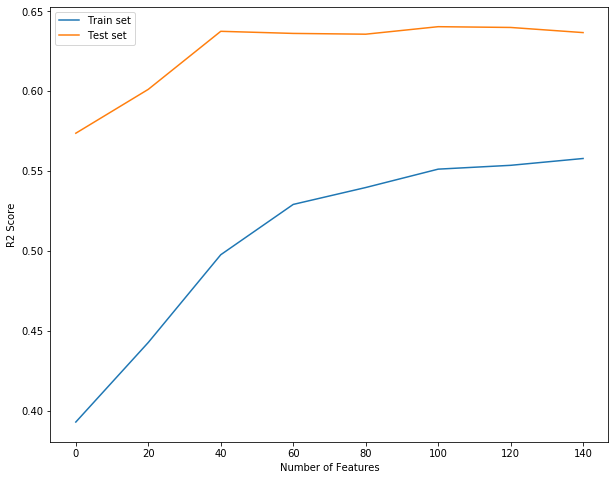

In [69]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(top_features[0:8], r2_train_scores[0:8], top_features[0:8], r2_test_scores[0:8]);
ax.set_xlabel('Number of Features')
ax.set_ylabel('R2 Score')
ax.legend(['Train set', 'Test set']);


In [70]:
max(r2_test_scores)

0.6403571397875121

Adding about 100 of the rest encoded categorical features the most variance we get to explain is 64%

### Random Forest approach

In [287]:
### don't run, takes about 3+ hours

from sklearn.ensemble import RandomForestRegressor

learner = LinearRegression()
learner = RandomForestRegressor()

r2_train_scores = []
r2_test_scores = []

top_features = [10*x for x in range(0,340)]

for top_f in top_features:
    chosen_features = list(price_corrs_abs.drop(amenitie_features + num_features).index[0:top_f])
    #print('Number of features: {} \n'.format(top_f))
    r2_train, r2_test = train_predict(learner, features, price,amenitie_features + num_features + chosen_features)
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)
    

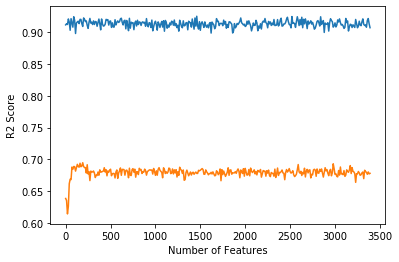

In [296]:
plt.plot(top_features, r2_train_scores, top_features, r2_test_scores);
plt.xlabel('Number of Features')
plt.ylabel('R2 Score')
plt.show();

In [300]:
top_features[np.argmax(r2_test_scores)]

190

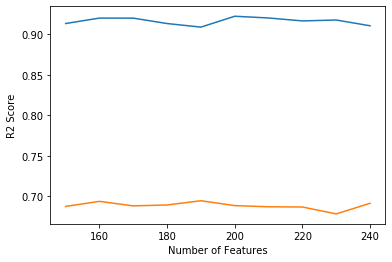

In [303]:
plt.plot(top_features[15:25], r2_train_scores[15:25], top_features[15:25], r2_test_scores[15:25]);
plt.xlabel('Number of Features')
plt.ylabel('R2 Score')
plt.show();

In [63]:
from sklearn.ensemble import RandomForestRegressor

learner = RandomForestRegressor()
# top_f = 94

r2_train_scores_rf = []
r2_test_scores_rf = []

top_features = [94,190]

for top_f in top_features:
    chosen_features = list(price_corrs_abs.drop(amenitie_features).index[0:top_f])
    #print('Number of features: {} \n'.format(top_f))
    r2_train, r2_test = train_predict(learner, features, price,amenitie_features + num_features + chosen_features)
    r2_train_scores_rf.append(r2_train)
    r2_test_scores_rf.append(r2_test)

print(r2_test_scores_rf)

[0.6789352322460791, 0.6682721882401825]


With this aproach, using at least 94 additional features we get to explain 67% of the variance in the listing price.

As a conclusion, we can sort of predict the price, not the greatest accuracy, but the +65% variance explanation is much better than a point estimate like the mean of the price. The best performance was given by the random forest approach but not that far behind was the linear regression approach, so both are a viable option, even maybe prefer for simplicity the linear regression.

Now for getting the features that affect price the most we are going to use the `feature_importances_` attribute retrieve the ones with the higher score.

In [65]:
from sklearn.ensemble import RandomForestRegressor

learner = RandomForestRegressor()
chosen_features = list(price_corrs_abs.drop(amenitie_features + num_features).index[0:94])


X = StandardScaler().fit_transform(features[num_features])
#X = PolynomialFeatures().fit_transform(X)
X = np.concatenate((X, features[chosen_features]), axis = 1)
y = price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
learner.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [132]:
feature_importance = pd.DataFrame(data = learner.feature_importances_,
                                 index = num_features+chosen_features,
                                 columns = ['feature_importance']).sort_values(by = 'feature_importance', ascending = False)
feature_importance = feature_importance.reset_index().rename(columns = {'index':'feature'})
feature_importance.head(6)

,feature,feature_importance
0,bedrooms,0.208605
1,longitude,0.123038
2,latitude,0.101874
3,"street_Congress Street, Boston, MA 02210, Unit...",0.066564
4,cleaning_fee,0.048111
5,bathrooms,0.048037


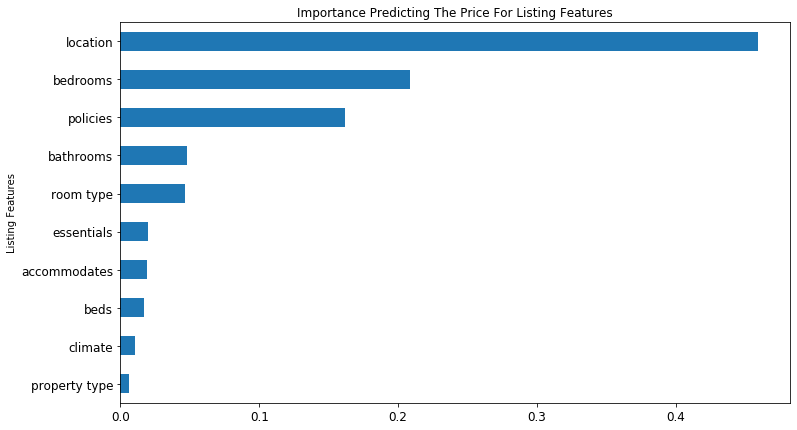

In [136]:
feature_dict = {'location':['zipcode', 'latitude', 'longitude', 'smart_location', 'street','neighbourhood'],
                'room type':['room_type'],
                'property type':['property_type'],
                'bed Type':['bed_type'],
                'policies':['security_deposit',
                            'minimum_nights',
                            'guests_included',
                            'cancellation_policy',
                            'cleaning_fee',
                            'extra_people',
                            'maximum_nights']}

feature_importance['feature_group'] = ''
for key in feature_dict.keys():
    for keyword in feature_dict[key]:
        feature_importance['feature_group'] = np.where(feature_importance['feature'].str.contains(keyword),
                                                       key,
                                                       feature_importance['feature_group'])

feature_importance['feature_group'] = np.where(feature_importance['feature_group']=='',
                                               feature_importance['feature'],
                                               feature_importance['feature_group'])

feature_importance.groupby(by = 'feature_group').sum().sort_values(by = 'feature_importance',ascending = True)\
                    .tail(10).plot(kind= 'barh',
                                 figsize = (12,7),
                                 legend = False,
                                 title = 'Importance Predicting The Price For Listing Features',
                                 xlabel = 'Listing Features',
                                 fontsize = 12);

The most important features for predicting the price are location related features, which might not be very surprising, also the number of bedrooms affect prices the most, was a surprise not seeing a very relevant the square footage of the stay. 

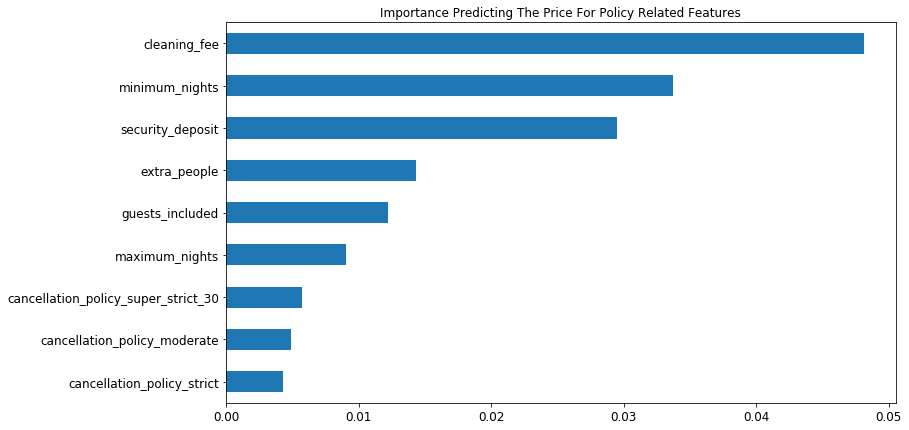

In [151]:
feature_importance[feature_importance['feature_group']=='policies'].set_index('feature').sort_values(by = 'feature_importance')\
                    .plot(kind = 'barh',
                          figsize = (12,7),
                          legend = False,
                          title = 'Importance Predicting The Price For Policy Related Features',
                          xlabel = '',
                          fontsize = 12)

The most important features for predicting the price are location related features, which might not be very surprising, also the number of bedrooms affect prices the most, was a surprise not seeing a very relevant the square footage of the stay.

##  What are the most negative comments about?

Let's start by exploring review info with the objective of defining poorly review listings probably from review score.

In [505]:
list_df.columns[list_df.columns.str.contains('review')]

Index(['number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

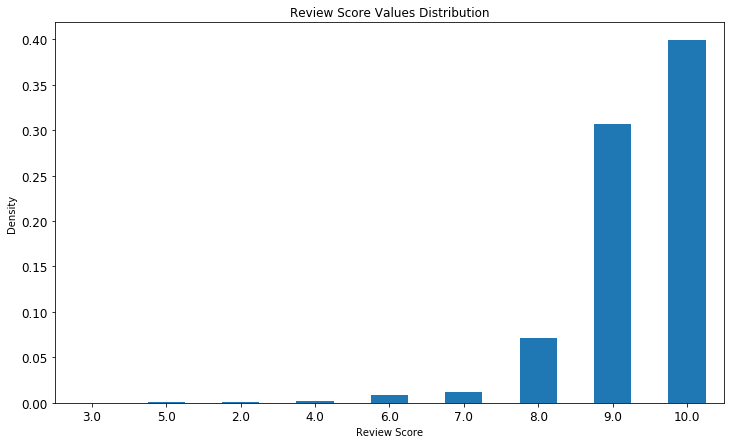

In [185]:
(list_df['review_scores_value'].value_counts()/list_df.shape[0]).sort_values(ascending = True)\
                                .plot(kind = 'bar',
                                      figsize = (12,7),
                                      legend = False,
                                      title = 'Review Score Values Distribution',
                                      xlabel = 'Review Score',
                                      ylabel = 'Density',
                                      fontsize = 12,
                                      rot = 0);

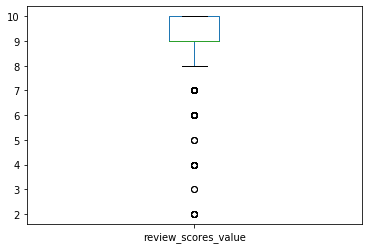

In [519]:
list_df['review_scores_value'].plot(kind = 'box')

In [520]:
list_df['review_scores_value'].describe()

count    5926.000000
mean        9.319777
std         0.892824
min         2.000000
25%         9.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: review_scores_value, dtype: float64

In [522]:
list_df['review_scores_value'].value_counts()

10.0    2952
9.0     2267
8.0      524
7.0       89
6.0       65
4.0       16
2.0        8
5.0        3
3.0        2
Name: review_scores_value, dtype: int64

We can se that most of the reviews are positive, so we are going to define `review_scores_value`>=8 a positive reviewed listing and `review_scores_value`< 8 a negative reviewed listing.

In [1]:
# >=8: 5743
# <8: 183
183/(5743+183)

0.030880863989200136

In [71]:
list_df['review_scores_value'].isnull().mean()

0.1995137106578414

In [524]:
list_df.shape

(7403, 95)

We are going to take away the negative reviewed listing for further analysis

In [27]:
list_df_rev = list_df.dropna(subset = ['review_scores_value'])
list_df_rev['review_scores_value'] = list_df_rev['review_scores_value'].astype(int)
list_df_rev.columns
bad_rev_id = list_df_rev[list_df_rev['review_scores_value'] <8]['id']

C:\Users\lccrurod\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
rev_df = pd.concat([pd.read_csv('Seattle/reviews.csv'),
                    pd.read_csv('Boston/reviews.csv')], axis = 0)
rev_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [31]:
bad_rev_df = rev_df[rev_df['listing_id'].isin(list(bad_rev_id))]
bad_rev_df.shape

(710, 6)

Now for identifiying the most negative comments we are going to use sentiment analysis, and more specific the polarity in the comments.

For starting we are going to make sure our comments are all in english, the polarity score we are going to use has trouble with other language.

In [ ]:
from googletrans import Translator

translator = Translator()
get_language = lambda x: translator.detect(x).lang

bad_rev_df = bad_rev_df.dropna(subset = ['comments'])

language = []
for n, com in enumerate(list(bad_rev_df.comments)):
    language.append(get_language(com))

In [35]:
len(language)

710

In [36]:
bad_rev_df['language'] = language
bad_rev_df['language'].value_counts()

en    710
Name: language, dtype: int64

Now that all comments are in english we can calculate the polarity of the sentiment for each comment.

In [37]:
from textblob import TextBlob
bad_rev_df = bad_rev_df[bad_rev_df['language'] == 'en']

get_sentiment = lambda x: TextBlob(x).sentiment[0]
bad_rev_df['comments_sentiment'] = bad_rev_df['comments'].apply(get_sentiment)
bad_rev_df.shape

(710, 8)

For validating how good are we capturing the actual sentiment of the commments we are going to take the average polarity and compare it with 

In [40]:
list_bad_sentiment = bad_rev_df[['listing_id', 'comments_sentiment']].groupby('listing_id').mean().reset_index()

bad_rev_list_df = list_df.merge(list_bad_sentiment,
                                'inner',
                                left_on = ['id'],
                                right_on = ['listing_id'],
                                suffixes = ['','_y'])
bad_rev_list_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,access,interaction,house_rules,listing_id,comments_sentiment
0,2769088,https://www.airbnb.com/rooms/2769088,20160104002432,2016-01-04,Rooftop Olympic View 4m Sunny Loft,Enjoy your stay in my extra bedroom in an arts...,The house is split into three units. I live in...,The house is split into three units. I live in...,none,In Ballard beyond the tourist attractions you'...,...,flexible,f,f,1,0.61,NaN,NaN,NaN,2769088,0.139764
1,5126077,https://www.airbnb.com/rooms/5126077,20160104002432,2016-01-04,Location and View in Queen Anne,Great location with easy access to downtown Se...,I have 2 bedrooms and 2 bathrooms in my home a...,Great location with easy access to downtown Se...,none,I'm located in mid Queen Anne. Three blocks a...,...,moderate,f,f,2,0.34,NaN,NaN,NaN,5126077,0.507500
2,5126365,https://www.airbnb.com/rooms/5126365,20160104002432,2016-01-04,Modern and Cozy Bedroom,This comfy cozy bedroom with modern touches is...,Our large home in the Wallingford neighborhood...,This comfy cozy bedroom with modern touches is...,none,Wallingford is a wonderful neighborhood just a...,...,moderate,f,f,2,0.30,NaN,NaN,NaN,5126365,0.362030
3,7182584,https://www.airbnb.com/rooms/7182584,20160104002432,2016-01-04,Cute Green Lake Cabin,This tiny Green Lake cabin is close to everyth...,Our little house is perfect for up to 4 adults...,This tiny Green Lake cabin is close to everyth...,none,This neighborhood is great! With a walk score ...,...,flexible,f,f,1,0.99,NaN,NaN,NaN,7182584,0.380499
4,6864319,https://www.airbnb.com/rooms/6864319,20160104002432,2016-01-04,Beautiful Craftsman House,"This fully-remodeled, 1902 Craftsman-style hom...","The house is spacious (1,650 sf) and bright wi...","This fully-remodeled, 1902 Craftsman-style hom...",none,Located on the border of Madrona and Madison V...,...,flexible,f,f,2,0.22,NaN,NaN,NaN,6864319,0.675000


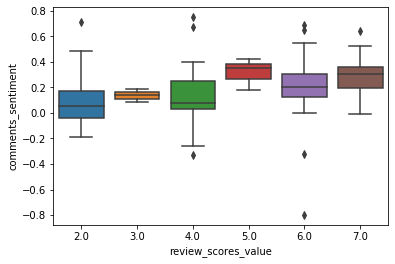

In [41]:
sns.boxplot(x = 'review_scores_value',
            y = 'comments_sentiment',
            data = bad_rev_list_df)

Text(0.5, 1.0, 'Sentiment Polarity vs Review Score')

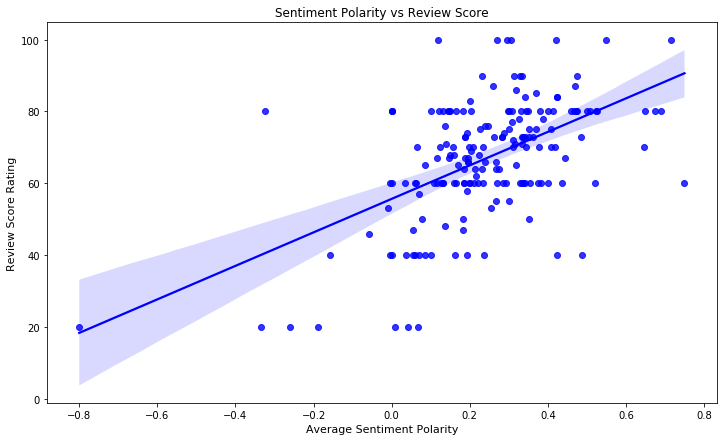

In [183]:
f, ax = plt.subplots(figsize=(12, 7))

sns.regplot(x="comments_sentiment", y="review_scores_rating",
              data=bad_rev_list_df,
              color="b",
              ax = ax);

ax.set_xlabel('Average Sentiment Polarity', fontsize = 11)
ax.set_ylabel('Review Score Rating', fontsize = 11)
ax.set_title('Sentiment Polarity vs Review Score')

In [43]:
bad_rev_list_df[['review_scores_rating', 'comments_sentiment']].corr()

,review_scores_rating,comments_sentiment
review_scores_rating,1.000000,0.535625
comments_sentiment,0.535625,1.000000


Although it's not the clearest reationtinship between `review_scores_rating` and the `comments_sentiment` as one would've wanted,  we have to keep in mind that we are taking the average of all the sentiments for all the reviews that a listing has been given, so the actual scoring system might be different, giving a different weight to bad reviews for example, for this analysis we are going to work with this sentiments scores.

Now for identifiying what are the most negative reviews about? We can se the top bottom comments by comment sentiment.

In [47]:
worst_coms = bad_rev_df[['comments', 'comments_sentiment']].sort_values(by = 'comments_sentiment').head(6)['comments']

for com in list(worst_coms):
    print(com,'\n')

Terrible room. It's a futon bed with no sheets. 

Air condition and wifi were terrible also home was so dirty 

Mike was very anxious to help me find my way, both to his apartment and around Seattle. 

Not good -- miscommunication with the host unfortunately lead to one of our employees getting kicked out of the apartment due to a reactive situation.  

This place was small, cramped, and very dirty. The bathroom was so dirty that I went out and bought cleaning supplies to use it. The room itself was covered in cat hair and there was CAT LITTER all over the ground. The bed is extremely unstable and would squeak at the slightest hint of movement. I spoke to one of the people who lived there and they explained to me that roughly nine other people lived there, which included people sleeping on the couches in the living room. The place smelled like pot every single day of the two weeks that I was there, which makes sense as the permanent tenants are all students. The smoke detector had been

We can see a common theme here

1. Misleading info or pictures in the listing.
2. Dirty stays.
3. Poor communication or bad relation with the host.

So this would be the main complaints in this top negative comments.